# Introduction
Our project will collect the movies’ plot summaries data from IMDB, use NLP technology to process the data, do clustering for our dataset, and finally define a function that can recommend a most similar movie according to the movie we entered.
In this project, we will use all the knowledge that we learnt from the IMT511, such as the collaborative work environment in git, functions, logic & conditions and loops, the basic data structure of list, tuple and dictionary, how to access data through databases’ APIs and how to do basic data analysis and create charts by Python.
The specific steps of our project could be listed as follows:
#### Step1:
Access movies data from IMDB with API. Because of GitHub's limitation, in this project we only deal with the movies that were released in July, 2018. We hided our API keys, so if you want to run our codes, please use your own API key. Thank you.
#### Step2:
Descriptive Analysis. We summarize those movies released in July, 2018.
#### Step3:
NLP. We convert our text data to corresponding numeric form by using TF-IDF and filter the data by using English stopwords (NLTK, Convectorizer).
#### Step4:
We conduct clustering analysis to the movies. The movies within one cluster sharing similar properties (sklearn,k-means).
#### Step5:
We calculate the similarity distance between movies(cosine_similarity) and plot a dendrogram of the movies.
#### Step6:
We define a function so that once the user inputs a movie in the provided list, he/she could receive the most similar movies.

In [1]:
#imported the library or packages we need over the all sections

from apikeys import my_api_key
import requests
import json
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import TweetTokenizer, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math as m
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
movie_df = pd.read_csv('data/movie_table_data.csv')

In [5]:
movie_df.head(10)

,id,vote_average,vote_count,title,genre_id,overview,popularity,original_language,release_date,production_companies_id,homepage,imdb_id,revenue,tagline
0,299534,8.3,13196,Avengers: Endgame,"[12, 878, 28]",After the devastating events of Avengers: Infi...,52.234,en,2019-04-24,[420],https://www.marvel.com/movies/avengers-endgame,tt4154796,2797800564,Part of the journey is the end.
1,19995,7.4,21287,Avatar,"[28, 12, 14, 878]","In the 22nd century, a paraplegic Marine is di...",34.668,en,2009-12-10,"[444, 574, 25, 290]",http://www.avatarmovie.com/,tt0499549,2787965087,Enter the World of Pandora.
2,140607,7.4,14420,Star Wars: The Force Awakens,"[28, 12, 878, 14]",Thirty years after defeating the Galactic Empi...,31.142,en,2015-12-15,"[1634, 1, 11461]",http://www.starwars.com/films/star-wars-episod...,tt2488496,2068223624,Every generation has a story.
3,299536,8.3,18166,Avengers: Infinity War,"[12, 28, 878]",As the Avengers and their allies have continue...,99.854,en,2018-04-25,[420],https://www.marvel.com/movies/avengers-infinit...,tt4154756,2046239637,An entire universe. Once and for all.
4,597,7.8,16931,Titanic,"[18, 10749]",101-year-old Rose DeWitt Bukater tells the sto...,35.661,en,1997-11-18,"[4, 574, 25]",NaN,tt0120338,1845034188,Nothing on Earth could come between them.
5,135397,6.6,15558,Jurassic World,"[28, 12, 878, 53]",Twenty-two years after the events of Jurassic ...,30.966,en,2015-06-06,"[3341, 56, 923, 33, 1778, 862]",http://www.jurassicworld.com/,tt0369610,1671713208,The park is open.
6,420818,7.2,5731,The Lion King,"[12, 10751]","Simba idolizes his father, King Mufasa, and ta...",63.319,en,2019-07-12,"[2, 7297]",https://movies.disney.com/the-lion-king-2019,tt6105098,1656943394,The King has Returned.
7,24428,7.7,22372,The Avengers,"[878, 28, 12]",When an unexpected enemy emerges and threatens...,60.389,en,2012-04-25,"[420, 4]",http://marvel.com/avengers_movie/,tt0848228,1519557910,Some assembly required.
8,168259,7.3,7497,Furious 7,"[28, 53]",Deckard Shaw seeks revenge against Dominic Tor...,28.434,en,2015-04-01,"[87857, 33, 40890, 333, 3341, 86352, 87858, 17...",http://www.furious7.com/,tt2820852,1515047671,Vengeance Hits Home
9,99861,7.3,15812,Avengers: Age of Ultron,"[28, 12, 878]",When Tony Stark tries to jumpstart a dormant p...,33.656,en,2015-04-22,[420],http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,1405403694,A New Age Has Come.


# Part2: Descriptive Analysis
Visualize the information and vote distribution chart of the movies that were released in July 2018
Extract the data we need for the future analysis and transform them in dataframe.

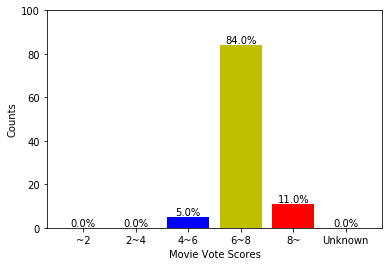

In [12]:
# Vote distribution (Use for loops and conditional statements):

def vote_distribution():
    '''Define a function that does not have argument, 
       acess the data from movie_list,
       get the vote information and its frequence 
       and output a bar chart that described the distriution of votes_average '''
    vote_list = [movie_df['vote_average'][i] for i in range(len(movie_df))]
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    for n in vote_list:
        if n > 0 and n <=2:
            count_1 = count_1 + 1
        elif n > 2 and n <= 4:
            count_2 = count_2 + 1
        elif n > 4 and n <= 6:
            count_3 = count_3 + 1
        elif n > 6 and n <= 8:
            count_4 = count_4 + 1
        elif n > 8:
            count_5 = count_5 + 1
        else:
            count_6 = count_6 + 1
    name_list = ['~2', '2~4', '4~6', '6~8', '8~', 'Unknown'] #group the movies by its range of average_vote
    num_list = [count_1, count_2, count_3, count_4, count_5, count_6]
    rects=plt.bar(range(len(num_list)), num_list, color='rgby')
    index=[0,1,2,3,4,5]
    index=[float(c) for c in index]
    plt.ylim(top=100, bottom=0)
    plt.xticks(index, name_list)
    plt.ylabel("Counts") 
    plt.xlabel("Movie Vote Scores")
    sum = count_1+count_2+count_3+count_4+count_5+count_6
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, str(round(height/sum*100,2))+'%', ha='center', va='bottom')
    plt.show()

vote_distribution()

# Part3: NLP
In this part, we use the popular Natural Language Processing techniques - token and stem to deal with our text data in the overview column.

In [9]:
# define a tokenizing function:
def tokenizing(text):
    '''Define a function that takes text as input,
       breaks down the text into individual sentences or words,
       renoves tokens which are entirely numeric values or punctuation'''
    import nltk
    text = text.replace("'",' ')
    tokenizer_words = TweetTokenizer()
    sent_tokenized = [sent for sent in nltk.sent_tokenize(text)]
    words_tokenized_all = [word for n in range(len(sent_tokenized)) for word in tokenizer_words.tokenize(sent_tokenized[n])]
    filtered_all = [word for word in words_tokenized_all if re.search('[a-zA-Z]', word)]
    
    return filtered_all

In [10]:
# Test the function 
filtered_all = tokenizing("Today (May 19, 2016) is his only daughter's wedding. Vito Corleone is the Godfather.")
filtered_all

['Today',
 'May',
 'is',
 'his',
 'only',
 'daughter',
 's',
 'wedding',
 'Vito',
 'Corleone',
 'is',
 'the',
 'Godfather']

In [11]:
# define a stemming function:
def stemming(word_list):
    '''Define a function that takes a word list as input,
       brings down a word from its different forms to the root word
       and outputs all the stemmed word in the order of original word list'''
    from nltk.stem.snowball import SnowballStemmer
    stemmer = SnowballStemmer("english")
    stemmed_words = [stemmer.stem(word) for word in word_list]
    return stemmed_words

In [12]:
# test the function
stemming(filtered_all)

['today',
 'may',
 'is',
 'his',
 'onli',
 'daughter',
 's',
 'wed',
 'vito',
 'corleon',
 'is',
 'the',
 'godfath']

In [13]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):  
    '''Define a function that takes text as argument,
       and performs both stemming and tokenization'''
    tokens = tokenizing(text) # Tokenize by sentence, then by word
    stems = stemming(tokens) # Stem the filtered_tokens
    return stems

In [14]:
# test the function
words_stemmed = tokenize_and_stem("Woody has always been confident about his place in the world and that his priority is taking care of his kid, whether that's Andy or Bonnie. But when Bonnie adds a reluctant new toy called 'Forky' to her room, a road trip adventure alongside old and new friends will show Woody how big the world can be for a toy.")
print(words_stemmed)

['woodi', 'has', 'alway', 'been', 'confid', 'about', 'his', 'place', 'in', 'the', 'world', 'and', 'that', 'his', 'prioriti', 'is', 'take', 'care', 'of', 'his', 'kid', 'whether', 'that', 's', 'andi', 'or', 'bonni', 'but', 'when', 'bonni', 'add', 'a', 'reluct', 'new', 'toy', 'call', 'forki', 'to', 'her', 'room', 'a', 'road', 'trip', 'adventur', 'alongsid', 'old', 'and', 'new', 'friend', 'will', 'show', 'woodi', 'how', 'big', 'the', 'world', 'can', 'be', 'for', 'a', 'toy']


In [15]:
tokenize_and_stem(movie_df['overview'][31])

['woodi',
 'buzz',
 'and',
 'the',
 'rest',
 'of',
 'andi',
 's',
 'toy',
 'haven',
 't',
 'been',
 'play',
 'with',
 'in',
 'year',
 'with',
 'andi',
 'about',
 'to',
 'go',
 'to',
 'colleg',
 'the',
 'gang',
 'find',
 'themselv',
 'accident',
 'left',
 'at',
 'a',
 'nefari',
 'day',
 'care',
 'center',
 'the',
 'toy',
 'must',
 'band',
 'togeth',
 'to',
 'escap',
 'and',
 'return',
 'home',
 'to',
 'andi']

In [16]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer_live = TfidfVectorizer(max_df=0.99, max_features=200000,
                                 min_df=0.05, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [83]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix_movie = tfidf_vectorizer_live.fit_transform([x for x in movie_df['overview']])
print(tfidf_matrix_movie.shape)

(100, 96)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [5]:
movie_df['text'] = movie_df['title']+' ' +movie_df['overview']

In [7]:
movie_df['text']

0     Avengers: Endgame After the devastating events...
1     Avatar In the 22nd century, a paraplegic Marin...
2     Star Wars: The Force Awakens Thirty years afte...
3     Avengers: Infinity War As the Avengers and the...
4     Titanic 101-year-old Rose DeWitt Bukater tells...
                            ...                        
95    Madagascar 3: Europe's Most Wanted Animal pals...
96    Suicide Squad From DC Comics comes the Suicide...
97    The Chronicles of Narnia: The Lion, the Witch ...
98    Monsters University A look at the relationship...
99    Deadpool 2 Wisecracking mercenary Deadpool bat...
Name: text, Length: 100, dtype: object

In [18]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix_movie_2 = tfidf_vectorizer_live.fit_transform([x for x in movie_df['text']])
print(tfidf_matrix_movie_2.shape)

(100, 105)


# Part4: Clustering
To determine how closely one movie is related to the other, we can use clustering techniques. A good basis of clustering in our dataset could be the genre of the movies. So, we use K-Means to do the clustering analysis in our dataset.

In [19]:
def draw_elbow_curve(matrix):
    '''Define a function that take a matrix as argument,
       uses a for-loop to iterate the k-value,
       outputs a picture that shows the relationship between the distosions and k-values of the dataset '''
    distorsions = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(matrix)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1,10), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')
    plt.show()

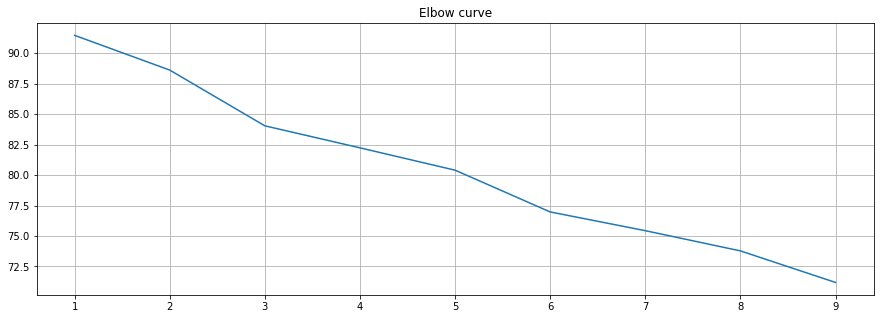

In [20]:
# draw the elbow cureve for the data
draw_elbow_curve(tfidf_matrix_movie_2)

In [86]:
# display the number of films per cluster 
def display_cluster_movie(num_cluster):
    '''Define a function that take the number of clusters as an argument,
       fit the k-means model with the dataset,
       outputs the number of films per clusters'''
    km =KMeans(n_clusters=num_cluster) # Create a KMeans object with 6 clusters and save as km
    km.fit(tfidf_matrix_movie) # Fit the k-means object with tfidf_matrix
    clusters = km.labels_.tolist() # Create a column cluster to denote the generated cluster for each movie
    movie_df['cluster'] = clusters
    movie_df['cluster'].value_counts() # Display number of films per cluster (clusters from 0 to 4)
    sns.countplot(km.labels_)
    plt.show()

In [21]:
# display the number of films per cluster 
def display_cluster_movie(num_cluster):
    '''Define a function that take the number of clusters as an argument,
       fit the k-means model with the dataset,
       outputs the number of films per clusters'''
    km =KMeans(n_clusters=num_cluster) # Create a KMeans object with 6 clusters and save as km
    km.fit(tfidf_matrix_movie_2) # Fit the k-means object with tfidf_matrix
    clusters = km.labels_.tolist() # Create a column cluster to denote the generated cluster for each movie
    movie_df['cluster'] = clusters
    movie_df['cluster'].value_counts() # Display number of films per cluster (clusters from 0 to 4)
    sns.countplot(km.labels_)
    plt.show()

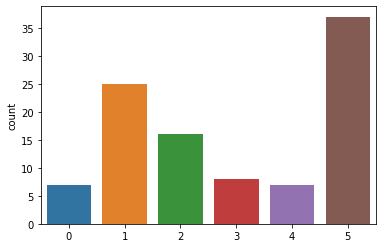

In [23]:
# output the number of films per cluster
display_cluster_movie(6)

# Part5: Calculate similarity distance
After doing the clustering analysis, we need to calculate the similarity distance between each two movies and use dendrogram to see the distribution of all movies in those six clusters.

In [89]:
# Calculate the similarity distance
similarity_distance_movie = 1 - cosine_similarity(tfidf_matrix_movie)
similarity_distance_movie

array([[ 0.00000000e+00,  7.44346508e-01,  8.88288487e-01, ...,
         7.81702961e-01,  1.00000000e+00,  1.00000000e+00],
       [ 7.44346508e-01,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 8.88288487e-01,  1.00000000e+00, -2.22044605e-16, ...,
         8.74768580e-01,  1.00000000e+00,  8.33210761e-01],
       ...,
       [ 7.81702961e-01,  1.00000000e+00,  8.74768580e-01, ...,
        -2.22044605e-16,  1.00000000e+00,  5.48904816e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -2.22044605e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  8.33210761e-01, ...,
         5.48904816e-01,  1.00000000e+00,  0.00000000e+00]])

In [24]:
# Calculate the similarity distance
similarity_distance_movie_2 = 1 - cosine_similarity(tfidf_matrix_movie_2)
similarity_distance_movie_2

array([[ 0.00000000e+00,  8.34694095e-01,  8.74398897e-01, ...,
         8.29542911e-01,  1.00000000e+00,  1.00000000e+00],
       [ 8.34694095e-01, -2.22044605e-16,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 8.74398897e-01,  1.00000000e+00,  0.00000000e+00, ...,
         8.84501323e-01,  1.00000000e+00,  8.46878603e-01],
       ...,
       [ 8.29542911e-01,  1.00000000e+00,  8.84501323e-01, ...,
         0.00000000e+00,  1.00000000e+00,  5.51513091e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  8.46878603e-01, ...,
         5.51513091e-01,  1.00000000e+00,  0.00000000e+00]])

In [90]:
# Create merging and plot dendrogram
def draw_dendrogram_movie():
    '''Define a function that has no argument and outputs the dendrogram of the dataset'''
    mergings =linkage(similarity_distance_movie, method='complete') # Create mergings matrix 
    dendrogram_ = dendrogram(mergings,
               labels=[x for x in movie_df["id"]],
               leaf_rotation=90,
               leaf_font_size=16,) # Plot the dendrogram, using title as label column
    fig = plt.gcf() # Adjust the plot
    fig.set_size_inches(108, 50)
    plt.show() # Show the plotted dendrogram

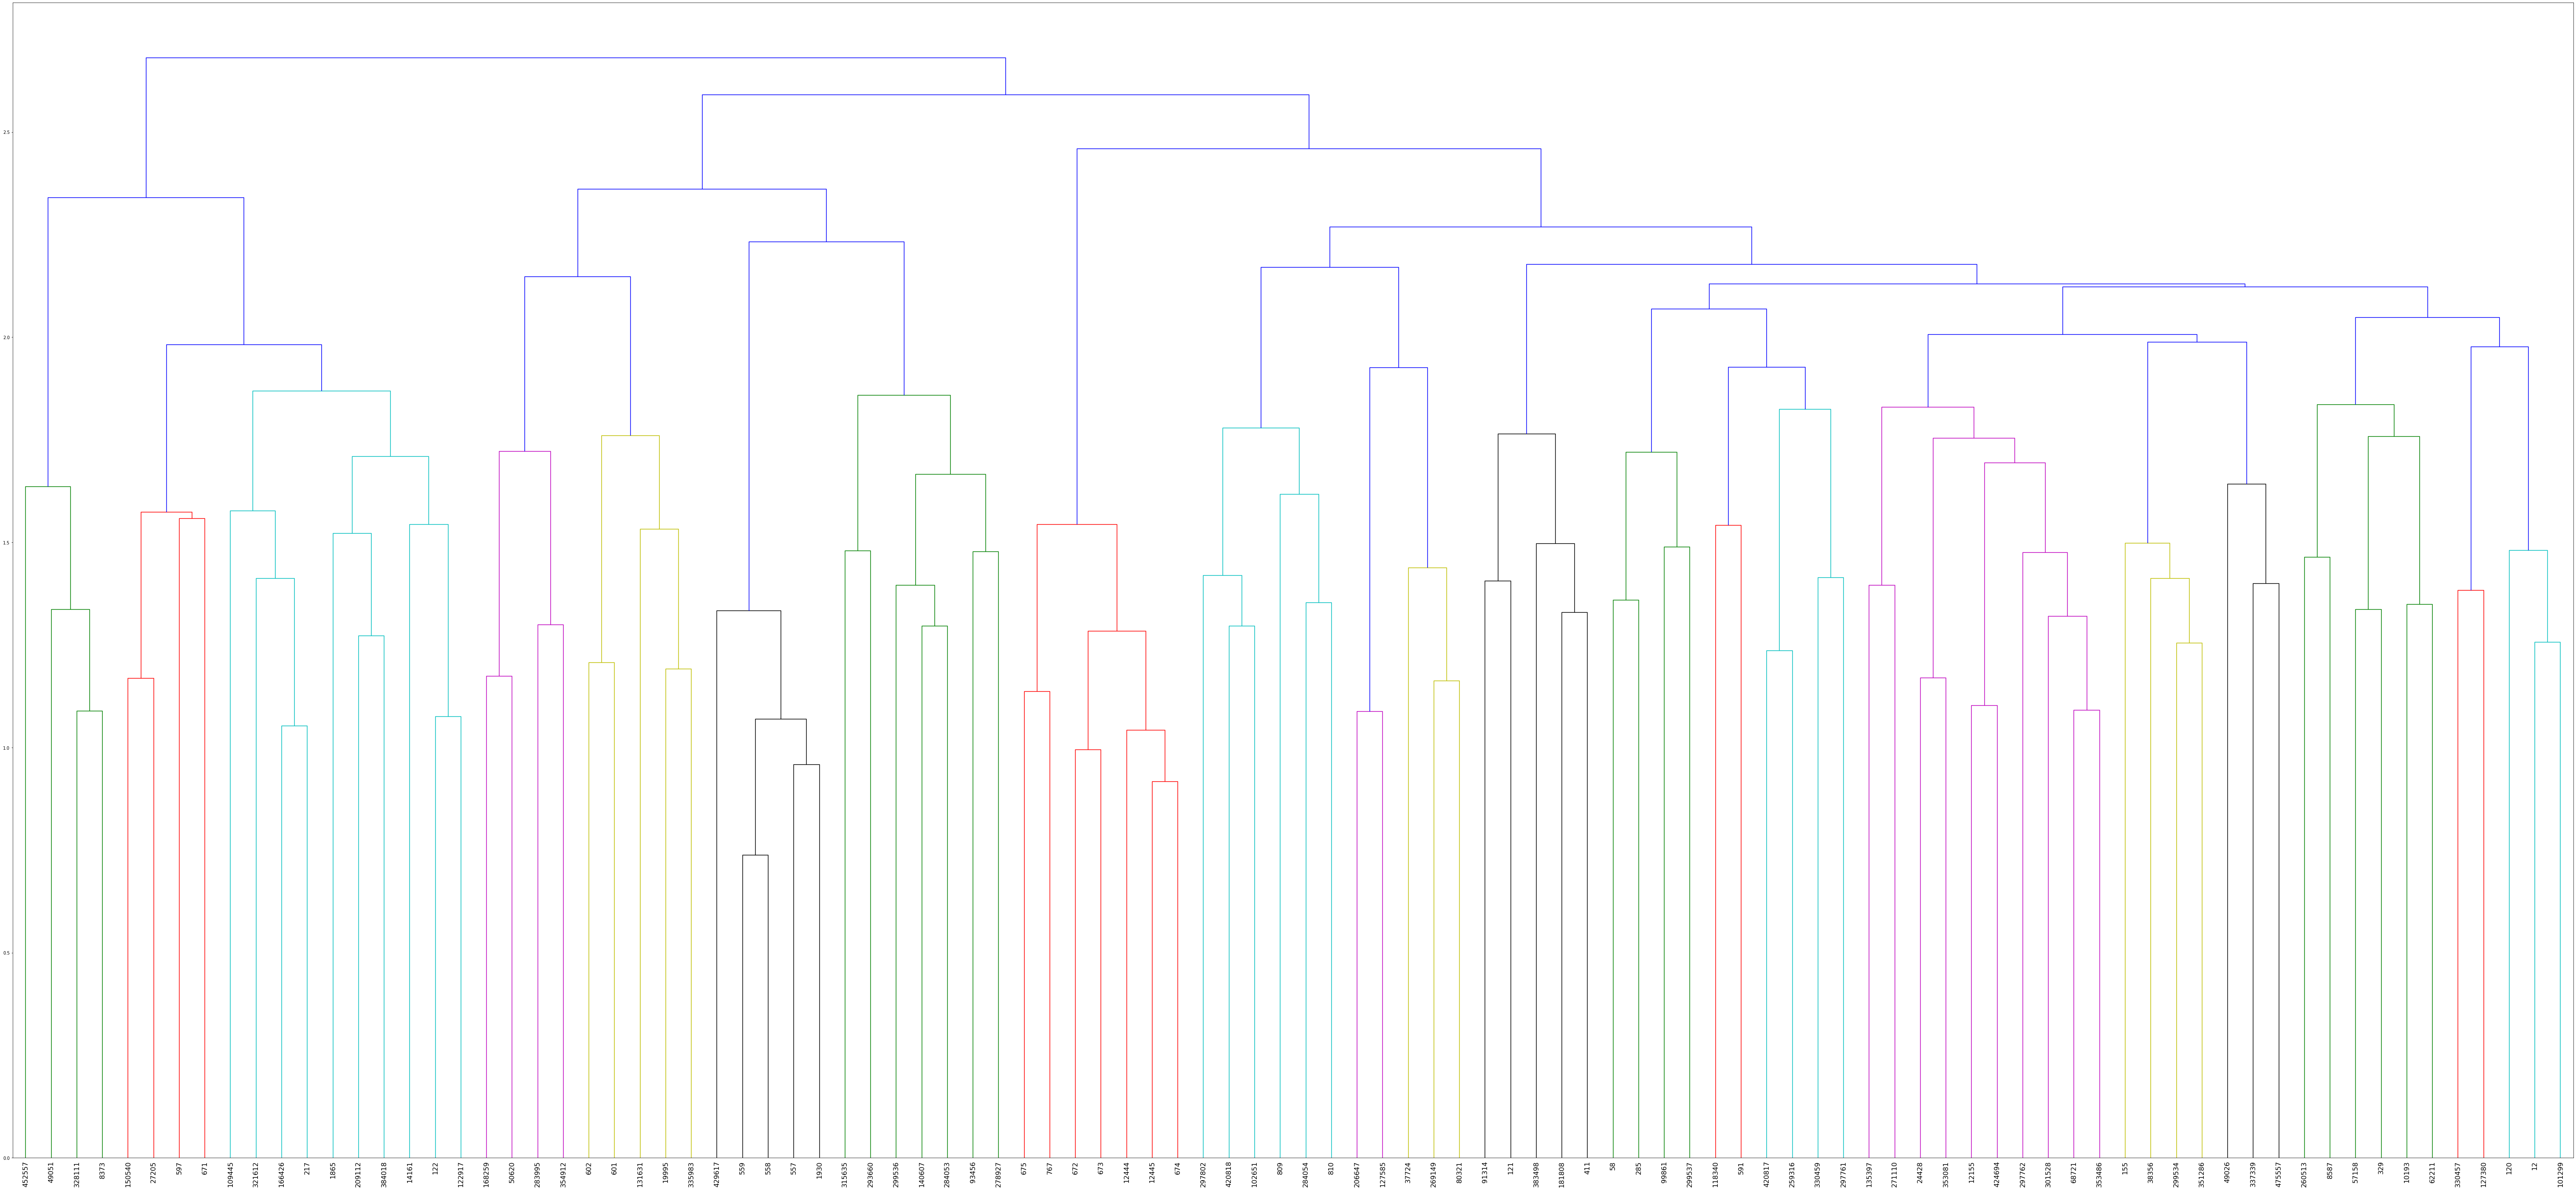

In [91]:
draw_dendrogram_movie()

In [25]:
# Create merging and plot dendrogram
def draw_dendrogram_movie():
    '''Define a function that has no argument and outputs the dendrogram of the dataset'''
    mergings =linkage(similarity_distance_movie_2, method='complete') # Create mergings matrix 
    dendrogram_ = dendrogram(mergings,
               labels=[x for x in movie_df["id"]],
               leaf_rotation=90,
               leaf_font_size=16,) # Plot the dendrogram, using title as label column
    fig = plt.gcf() # Adjust the plot
    fig.set_size_inches(108, 50)
    plt.show() # Show the plotted dendrogram

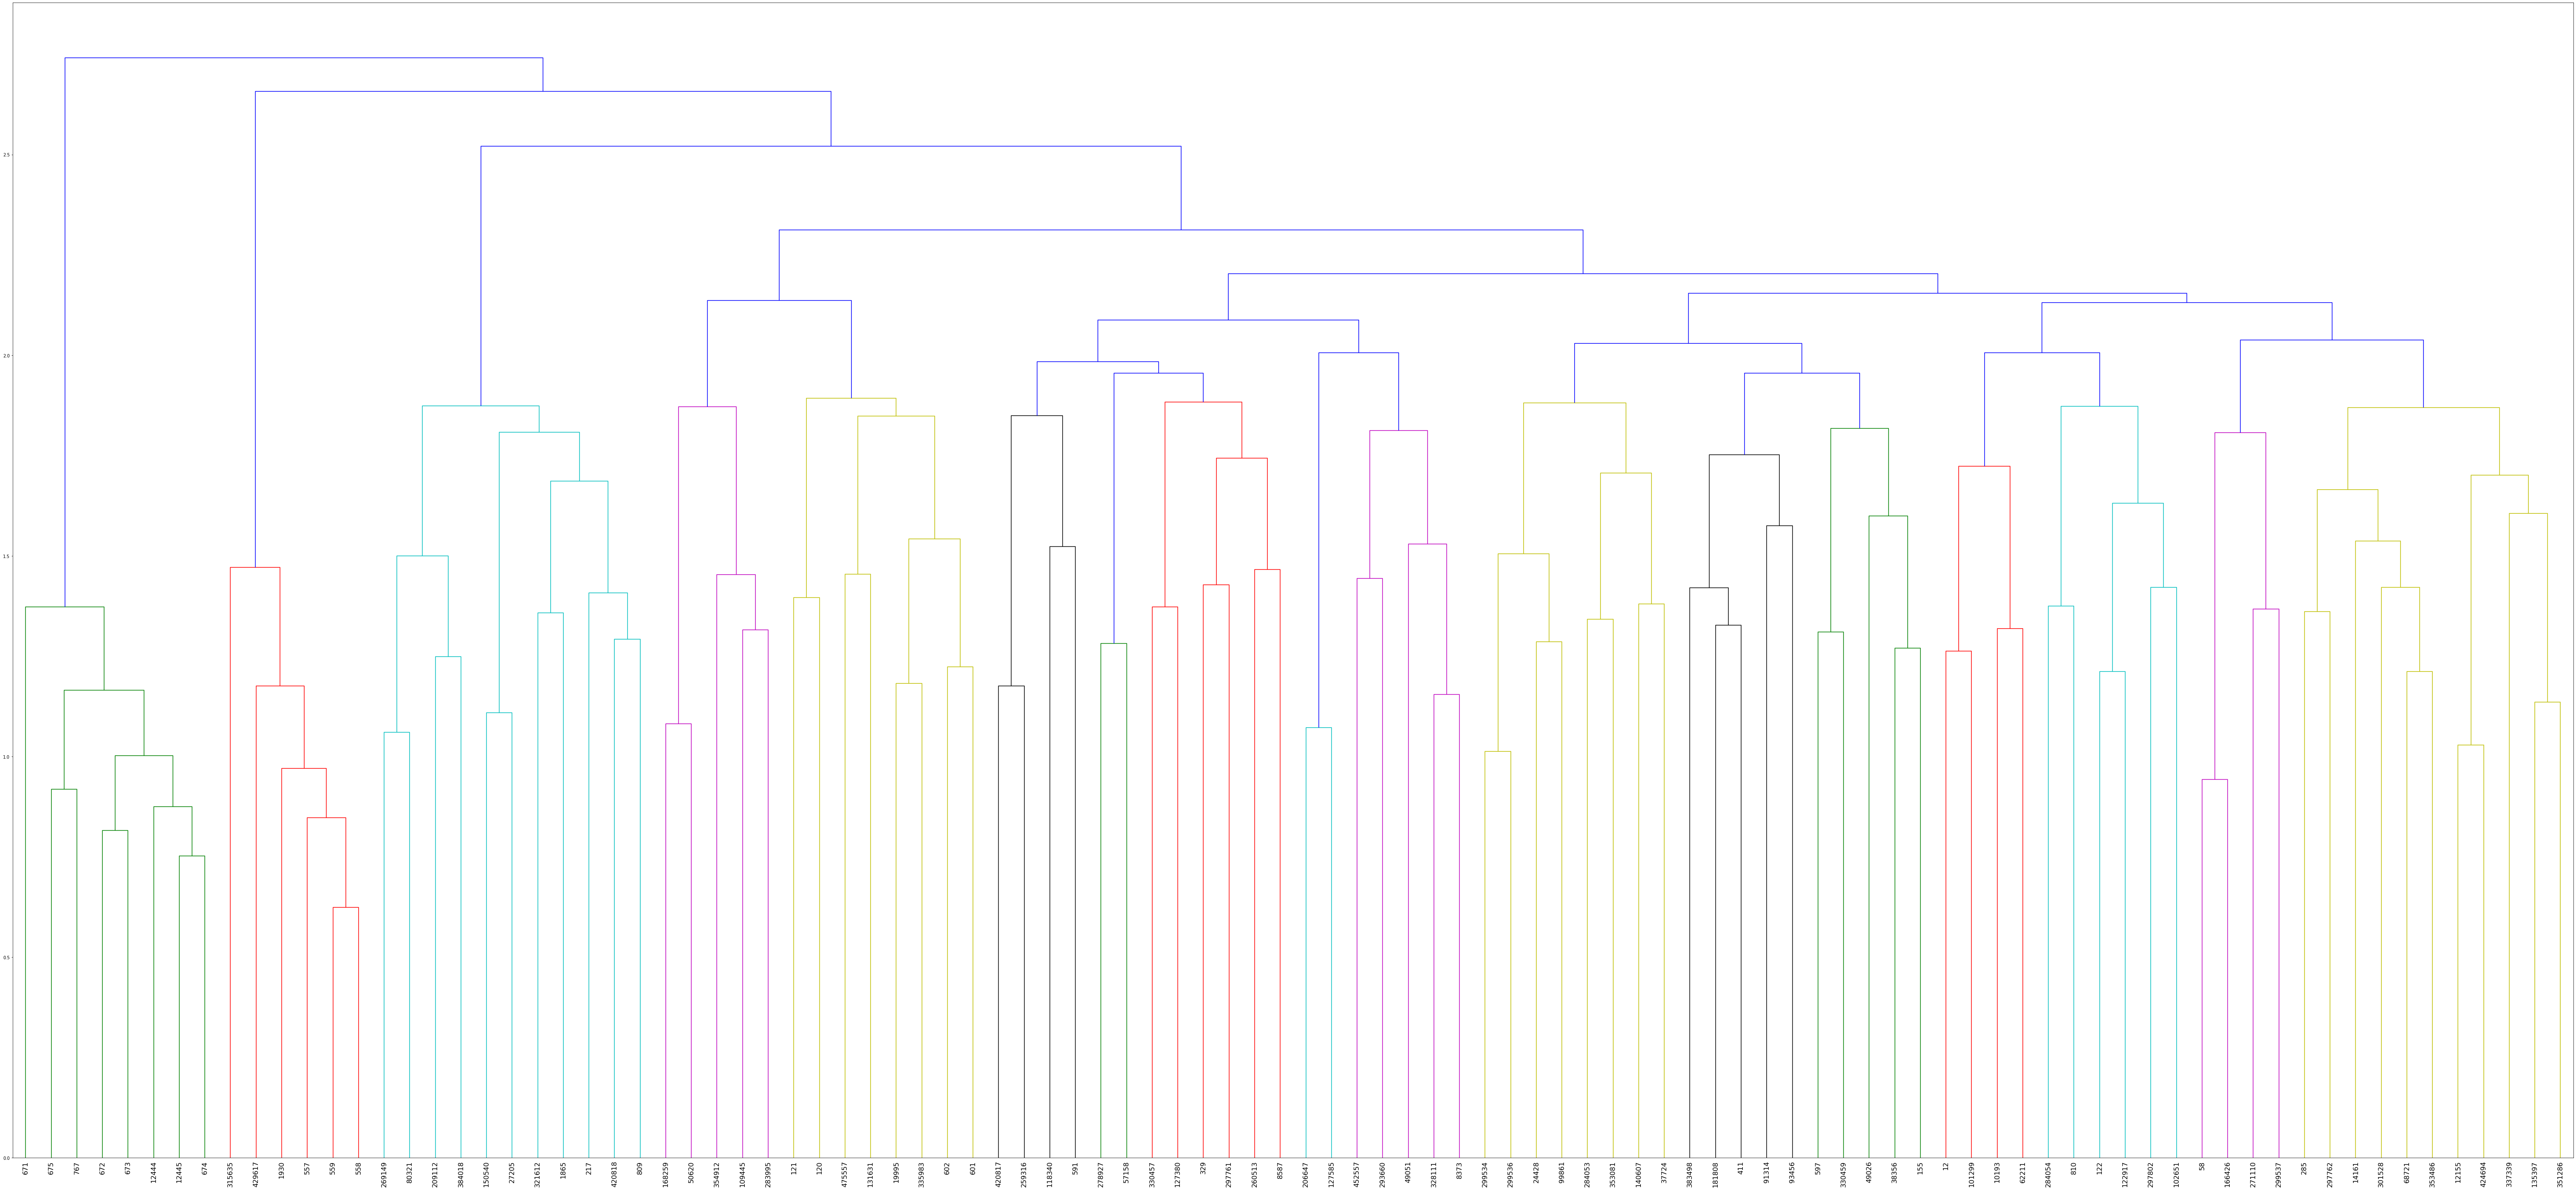

In [26]:
draw_dendrogram_movie()

# Part6: Find the most similar movie
By drawing the dendrogram, we could find out which movies are in the same cluster by defining different levels of cut-off values. But, if the dataset is too large, it is hard for users to find the closest one in the picture. So, we leverage the similar distance among movies and provide users the information of the cloest movie given a certain movie.

In [ ]:
# #  helper functions
# def genre_name(genre_id):
#     '''Define a function that takes genre_id as argument,
#        and transforms genre ids into genre names:'''
#     for n in range(len(genre_list)):
#         if genre_id == genre_list[n]['id']:
#             return genre_list[n]['name']

# def get_similarity_distances(movie):
#     '''Define a  function that takes movie as an argument,
#        and returns the similarity distance of the movie we input with other movies in the pool'''
#     movie_index = list(movies_data['title']).index(movie)
#     return similarity_distance_movie[movie_index]

# def get_similar_movie(movie):
#     '''Define a function that looks for the most similar movie according to the similarities and genre,
#        and returns the title and distance of the similar movie'''
#     distances = get_similarity_distances(movie)
#     movie_index = list(movies_data['title']).index(movie)
#     index = 0
#     distance = 1
#     for n in range(len(distances)):
#         if distances[n] < distance and distances[n] > 0:
#             for i in movies_data.loc[movie_index,'genre_ids']:
#                 for x in movies_data.loc[n,'genre_ids']:
#                     if i == x:
#                         index = n
#                         distance = distances[n]
#     similar_movie = movies_data.loc[index,'title']
#     return similar_movie

# def display_movie_information(movie):
#     '''Define a function that takes the movie as argument,
#        and displays all the movie's information (using formatting):'''
#     print("The most similar movie's information is displayed below:")
#     print("{0:<45} {1:<10} {2:<30}".format('MOVIE','VOTE','GENRE'))
#     index = list(movies_data['title']).index(movie)
#     if movie_list[index]['genre_ids'] != []:
#         genre_names = genre_name(movie_list[index]['genre_ids'][0])
#         for n in range(1, len(movie_list[index]['genre_ids'])):
#             genre_names = genre_names + ', ' +genre_name(movie_list[index]['genre_ids'][n])
#     else:
#         genre_names = ''
#     print("{0:<45} {1:<10} {2:<30}".format(movie,movie_list[index]['vote_average'],genre_names))
#     print('OVERVIEW: '+movie_list[index]['overview'])
    
# # main function
# def find_the_similar_movie():
#     '''Define the function that inputs the name of a movie we want to search for, 
#        and outputs the most similar movie by displaying the movie's information'''
#     s = input('Please input a movie name that was released in July, 2018: ')
#     movie_name_list = [name for name in movies_data['title']]
#     if s in movie_name_list:
#         movie_name = s
#         similar_movie = get_similar_movie(movie_name)
#         display_movie_information(similar_movie)
#     else:
#         print('Sorry, the movie you inputted was not released in July, 2018.')

In [98]:
def get_similarity_distances(movie_id):
    '''Define a  function that takes movie as an argument,
       and returns the similarity distance of the movie we input with other movies in the pool'''
    movie_index = list(movie_df['id']).index(movie_id)
    return similarity_distance_movie[movie_index]



# main function
def get_similar_movie(movie_id):
    '''Define a function that looks for the most similar movie according to the similarities and genre,
       and returns the title and distance of the similar movie'''
    distances = get_similarity_distances(movie_id)
    movie_index = list(movie_df['id']).index(movie_id)
    s_list = sorted(zip(list(get_similarity_distances(284053)), list(movie_df['id'])))[:6]
    s_dict_list = []
    for i in range(1,len(s_list)):
        s_dict_list.append({'movie_id':movie_id, 
                           'similar_movie_id': s_list[i][1]})
    return s_dict_list

In [37]:
similar_movie_df = movie_df[['id']]

In [99]:
similar_list = []
for i in similar_movie_df['id']:
    similar_list = similar_list + get_similar_movie(i)

In [101]:
similar_df = pd.DataFrame(similar_list)

In [104]:
similar_df.to_csv('data/similar_movie_table_data.csv', index=False)

In [27]:
def get_similarity_distances(movie_id):
    '''Define a  function that takes movie as an argument,
       and returns the similarity distance of the movie we input with other movies in the pool'''
    movie_index = list(movie_df['id']).index(movie_id)
    return similarity_distance_movie_2[movie_index]



# main function
def get_similar_movie_2(movie_id):
    '''Define a function that looks for the most similar movie according to the similarities,
       and returns the title and distance of the similar movie'''
    distances = get_similarity_distances(movie_id)
    movie_index = list(movie_df['id']).index(movie_id)
    s_list = sorted(zip(list(get_similarity_distances(movie_id)), list(movie_df['id'])))[:6]
    s_dict_list = []
    for i in range(1,len(s_list)):
        s_dict_list.append({'movie_id':movie_id, 
                           'similar_movie_id': s_list[i][1]})
    return s_dict_list

In [28]:
similar_movie_df = movie_df[['id']]
similar_list = []
for i in similar_movie_df['id']:
    similar_list = similar_list + get_similar_movie_2(i)

In [29]:
similar_df = pd.DataFrame(similar_list)

In [30]:
similar_df

,movie_id,similar_movie_id
0,299534,299536
1,299534,99861
2,299534,271110
3,299534,351286
4,299534,24428
...,...,...
495,383498,411
496,383498,27205
497,383498,328111
498,383498,181808


In [31]:
similar_df.to_csv('data/similar_movie_table_data.csv', index=False)

# TRY TO CONNECT TO SQL SERVER

In [41]:
import pyodbc

In [42]:

print('Trying to connect')
try:
    myConnection = pyodbc.connect('DIVER={SQL Server};'
                                'SERVER=imt563-group2.database.windows.net;'
                                'DATABASE=Movie_Recommendation_System;'
                                'UID=group2-teammates;PWD=SuperSafePassword1234')
    print('Connected')
except:
    print('Could not connect')

Trying to connect
Could not connect


In [43]:
myConnection = pyodbc.connect('DRIVER={SQL Server};'
                                'SERVER=imt563-group2.database.windows.net;'
                                'DATABASE=Movie_Recommendation_System;'
                                'UID=group2-teammates;PWD=SuperSafePassword1234')

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'SQL Server' : file not found (0) (SQLDriverConnect)")

In [38]:
import pyodbc
drivers = [item for item in pyodbc.drivers()]
driver = drivers[-1]

IndexError: list index out of range

In [40]:
pypyodbc.drivers()

Exception: This function is available for use in Windows only.